# Model testing against jitter scan data
This notebook reads data from a jitter simulation scan and fits GP models to key quantities.
The models are used to perform additional jitter analysis

#### Reads data and fit model

In [1]:
import pandas as pd
import numpy as np
from optimas_pp.ax_model_manager import AxModelManager
import matplotlib.pyplot as plt
from scipy.stats import median_abs_deviation as mad

# reads data
df = pd.read_csv('./data/scan_data.csv')
print(list(df.columns))
varpars = ['laser_dE', 'laser_dzfoc', 'laser_dtau', 'laser_dT', 'laser_dx', 'laser_dy', 'beam_theta_x', 'beam_theta_y']

['Unnamed: 0', 'x_avg', 'y_avg', 'z_avg', 'theta_x', 'theta_y', 'sigma_x', 'sigma_y', 'sigma_z', 'z_fwhm', 'sigma_px', 'sigma_py', 'alpha_x', 'alpha_y', 'beta_x', 'beta_y', 'gamma_x', 'gamma_y', 'emitt_nx', 'emitt_ny', 'emitt_nx_sl', 'emitt_ny_sl', 'ene_avg', 'rel_ene_sp', 'rel_ene_sp_sl', 'i_peak', 'q', 'laser_dE', 'laser_dzfoc', 'laser_dtau', 'laser_dT', 'laser_dx', 'laser_dy', 'beam_theta_x', 'beam_theta_y']


In [2]:
metrics = ['ene_avg', 'emitt_nx']
models = dict.fromkeys(metrics)
for k in models.keys():
    models[k] = AxModelManager(df)
    models[k].build_model(parnames=varpars, objname=k)

[INFO 04-21 13:07:47] ax.service.utils.instantiation: Created search space: SearchSpace(parameters=[RangeParameter(name='laser_dE', parameter_type=FLOAT, range=[-1.3320629696310695, 1.1043308149905544]), RangeParameter(name='laser_dzfoc', parameter_type=FLOAT, range=[-301.6031985209298, 343.2663431795559]), RangeParameter(name='laser_dtau', parameter_type=FLOAT, range=[-2.698361741666047, 3.0308571123720305]), RangeParameter(name='laser_dT', parameter_type=FLOAT, range=[-11.645205612135028, 18.701244518522945]), RangeParameter(name='laser_dx', parameter_type=FLOAT, range=[-15.320706780525503, 16.605393780851823]), RangeParameter(name='laser_dy', parameter_type=FLOAT, range=[-13.954982033469232, 19.793013520189817]), RangeParameter(name='beam_theta_x', parameter_type=FLOAT, range=[-1.2067515005868938, 1.1950729811667558]), RangeParameter(name='beam_theta_y', parameter_type=FLOAT, range=[-1.5766787250955243, 1.413649897029825])], parameter_constraints=[]).
[INFO 04-21 13:07:47] ax.core.e

[INFO 04-21 13:07:47] ax.core.experiment: Attached custom parameterizations [{'laser_dE': -0.559558, 'laser_dzfoc': 195.60789, 'laser_dtau': -0.326499, 'laser_dT': -6.713379, 'laser_dx': 5.571915, 'laser_dy': -2.93262, 'beam_theta_x': -0.618427, 'beam_theta_y': 0.437919}] as trial 26.
[INFO 04-21 13:07:47] ax.core.experiment: Attached custom parameterizations [{'laser_dE': 0.311681, 'laser_dzfoc': -43.495668, 'laser_dtau': 1.40754, 'laser_dT': 0.645508, 'laser_dx': 8.084748, 'laser_dy': 2.513704, 'beam_theta_x': 0.779403, 'beam_theta_y': 0.054701}] as trial 27.
[INFO 04-21 13:07:47] ax.core.experiment: Attached custom parameterizations [{'laser_dE': -0.609872, 'laser_dzfoc': 244.936865, 'laser_dtau': -0.545774, 'laser_dT': -0.994189, 'laser_dx': -3.501993, 'laser_dy': -1.016972, 'beam_theta_x': 0.121335, 'beam_theta_y': 0.100915}] as trial 28.
[INFO 04-21 13:07:47] ax.core.experiment: Attached custom parameterizations [{'laser_dE': 0.33051, 'laser_dzfoc': 179.215821, 'laser_dtau': -0.1

[INFO 04-21 13:07:48] ax.core.experiment: Attached custom parameterizations [{'laser_dE': 0.225642, 'laser_dzfoc': -168.405999, 'laser_dtau': -1.16017, 'laser_dT': 6.750534, 'laser_dx': -1.656416, 'laser_dy': 1.932696, 'beam_theta_x': -0.425728, 'beam_theta_y': 0.500441}] as trial 55.
[INFO 04-21 13:07:48] ax.core.experiment: Attached custom parameterizations [{'laser_dE': -0.192416, 'laser_dzfoc': 145.810824, 'laser_dtau': -0.532234, 'laser_dT': 5.590667, 'laser_dx': 3.371981, 'laser_dy': -3.61196, 'beam_theta_x': 0.549498, 'beam_theta_y': -0.450817}] as trial 56.
[INFO 04-21 13:07:48] ax.core.experiment: Attached custom parameterizations [{'laser_dE': -0.411234, 'laser_dzfoc': 72.171129, 'laser_dtau': -0.625342, 'laser_dT': -2.969215, 'laser_dx': -1.719504, 'laser_dy': -5.000846, 'beam_theta_x': 0.522497, 'beam_theta_y': 0.304257}] as trial 57.
[INFO 04-21 13:07:48] ax.core.experiment: Attached custom parameterizations [{'laser_dE': -0.034664, 'laser_dzfoc': -10.839207, 'laser_dtau':

[INFO 04-21 13:07:48] ax.core.experiment: Attached custom parameterizations [{'laser_dE': 0.205133, 'laser_dzfoc': 85.987097, 'laser_dtau': -0.898683, 'laser_dT': 1.598285, 'laser_dx': 1.590771, 'laser_dy': -0.096158, 'beam_theta_x': 0.075008, 'beam_theta_y': 0.231767}] as trial 84.
[INFO 04-21 13:07:48] ax.core.experiment: Attached custom parameterizations [{'laser_dE': 0.19894, 'laser_dzfoc': -99.601089, 'laser_dtau': -1.195862, 'laser_dT': 12.529901, 'laser_dx': 9.598961, 'laser_dy': -6.958469, 'beam_theta_x': 0.225109, 'beam_theta_y': 0.313719}] as trial 85.
[INFO 04-21 13:07:48] ax.core.experiment: Attached custom parameterizations [{'laser_dE': 0.375669, 'laser_dzfoc': 14.039544, 'laser_dtau': -0.926872, 'laser_dT': -0.912102, 'laser_dx': -2.455626, 'laser_dy': 0.671866, 'beam_theta_x': -0.134186, 'beam_theta_y': -0.065838}] as trial 86.
[INFO 04-21 13:07:48] ax.core.experiment: Attached custom parameterizations [{'laser_dE': 0.509276, 'laser_dzfoc': 123.05582, 'laser_dtau': -1.1

[INFO 04-21 13:07:48] ax.core.experiment: Attached custom parameterizations [{'laser_dE': -0.018141, 'laser_dzfoc': -83.239535, 'laser_dtau': 1.923815, 'laser_dT': -3.029907, 'laser_dx': 9.017945, 'laser_dy': -2.262625, 'beam_theta_x': 0.580643, 'beam_theta_y': 0.534983}] as trial 113.
[INFO 04-21 13:07:48] ax.core.experiment: Attached custom parameterizations [{'laser_dE': -0.522767, 'laser_dzfoc': 35.528451, 'laser_dtau': 0.755392, 'laser_dT': 3.504911, 'laser_dx': -0.994687, 'laser_dy': 1.5098, 'beam_theta_x': -0.197345, 'beam_theta_y': -0.585907}] as trial 114.
[INFO 04-21 13:07:48] ax.core.experiment: Attached custom parameterizations [{'laser_dE': 0.492006, 'laser_dzfoc': -55.968142, 'laser_dtau': 1.379758, 'laser_dT': 3.012255, 'laser_dx': -4.463233, 'laser_dy': -0.805992, 'beam_theta_x': -0.143192, 'beam_theta_y': -0.435444}] as trial 115.
[INFO 04-21 13:07:48] ax.core.experiment: Attached custom parameterizations [{'laser_dE': 0.250715, 'laser_dzfoc': -47.861407, 'laser_dtau':

[INFO 04-21 13:07:48] ax.core.experiment: Attached custom parameterizations [{'laser_dE': 0.087027, 'laser_dzfoc': 17.794556, 'laser_dtau': -0.261202, 'laser_dT': 4.316317, 'laser_dx': -4.61539, 'laser_dy': -0.650976, 'beam_theta_x': 0.252527, 'beam_theta_y': -0.133502}] as trial 142.
[INFO 04-21 13:07:48] ax.core.experiment: Attached custom parameterizations [{'laser_dE': -0.61194, 'laser_dzfoc': 55.826422, 'laser_dtau': -0.982161, 'laser_dT': -2.236541, 'laser_dx': -4.140738, 'laser_dy': -0.553642, 'beam_theta_x': -0.214693, 'beam_theta_y': -0.237295}] as trial 143.
[INFO 04-21 13:07:48] ax.core.experiment: Attached custom parameterizations [{'laser_dE': 0.340489, 'laser_dzfoc': 176.26089, 'laser_dtau': -0.357514, 'laser_dT': 2.613276, 'laser_dx': -1.777067, 'laser_dy': 0.494711, 'beam_theta_x': 0.563876, 'beam_theta_y': 0.025147}] as trial 144.
[INFO 04-21 13:07:48] ax.core.experiment: Attached custom parameterizations [{'laser_dE': -0.407774, 'laser_dzfoc': -72.992661, 'laser_dtau'

[INFO 04-21 13:07:48] ax.core.experiment: Attached custom parameterizations [{'laser_dE': 0.39962, 'laser_dzfoc': 133.153252, 'laser_dtau': 0.520812, 'laser_dT': 0.291859, 'laser_dx': 3.60343, 'laser_dy': -7.727238, 'beam_theta_x': 0.819481, 'beam_theta_y': -0.662746}] as trial 171.
[INFO 04-21 13:07:48] ax.core.experiment: Attached custom parameterizations [{'laser_dE': 0.451855, 'laser_dzfoc': -56.416393, 'laser_dtau': 0.507252, 'laser_dT': -0.582837, 'laser_dx': 1.517949, 'laser_dy': -4.003935, 'beam_theta_x': -1.080314, 'beam_theta_y': 0.203328}] as trial 172.
[INFO 04-21 13:07:48] ax.core.experiment: Attached custom parameterizations [{'laser_dE': -0.300252, 'laser_dzfoc': -64.863577, 'laser_dtau': -0.725323, 'laser_dT': 9.922056, 'laser_dx': -2.910962, 'laser_dy': 1.634065, 'beam_theta_x': -0.580222, 'beam_theta_y': 0.761548}] as trial 173.
[INFO 04-21 13:07:48] ax.core.experiment: Attached custom parameterizations [{'laser_dE': -0.278134, 'laser_dzfoc': -260.064181, 'laser_dtau'

[INFO 04-21 13:07:49] ax.core.experiment: Attached custom parameterizations [{'laser_dE': 0.145502, 'laser_dzfoc': 107.489975, 'laser_dtau': -0.69781, 'laser_dT': -2.891629, 'laser_dx': -4.237263, 'laser_dy': 3.924523, 'beam_theta_x': 0.816638, 'beam_theta_y': 0.129371}] as trial 200.
[INFO 04-21 13:07:49] ax.core.experiment: Attached custom parameterizations [{'laser_dE': -0.31164, 'laser_dzfoc': -52.036103, 'laser_dtau': -1.112314, 'laser_dT': 3.655727, 'laser_dx': -5.314644, 'laser_dy': -1.273165, 'beam_theta_x': -0.584481, 'beam_theta_y': -0.949732}] as trial 201.
[INFO 04-21 13:07:49] ax.core.experiment: Attached custom parameterizations [{'laser_dE': -1.269978, 'laser_dzfoc': -88.996151, 'laser_dtau': 0.218078, 'laser_dT': -1.589078, 'laser_dx': -1.117874, 'laser_dy': -5.356899, 'beam_theta_x': -0.465841, 'beam_theta_y': -0.533851}] as trial 202.
[INFO 04-21 13:07:49] ax.core.experiment: Attached custom parameterizations [{'laser_dE': 0.105617, 'laser_dzfoc': 204.765484, 'laser_d

[INFO 04-21 13:07:49] ax.core.experiment: Attached custom parameterizations [{'laser_dE': -0.517231, 'laser_dzfoc': -33.935977, 'laser_dtau': 0.577612, 'laser_dT': 1.401146, 'laser_dx': 5.466533, 'laser_dy': -3.731121, 'beam_theta_x': 0.453131, 'beam_theta_y': 0.733312}] as trial 229.
[INFO 04-21 13:07:49] ax.core.experiment: Attached custom parameterizations [{'laser_dE': -0.071295, 'laser_dzfoc': 26.593014, 'laser_dtau': 0.225189, 'laser_dT': 2.678353, 'laser_dx': 1.939606, 'laser_dy': 7.347439, 'beam_theta_x': 0.256682, 'beam_theta_y': 0.432251}] as trial 230.
[INFO 04-21 13:07:49] ax.core.experiment: Attached custom parameterizations [{'laser_dE': 0.165763, 'laser_dzfoc': -104.177028, 'laser_dtau': 0.43336, 'laser_dT': -1.14978, 'laser_dx': -3.175437, 'laser_dy': -4.471853, 'beam_theta_x': -0.035199, 'beam_theta_y': -0.303732}] as trial 231.
[INFO 04-21 13:07:49] ax.core.experiment: Attached custom parameterizations [{'laser_dE': 1.019836, 'laser_dzfoc': 159.67719, 'laser_dtau': -0

[INFO 04-21 13:07:49] ax.core.experiment: Attached custom parameterizations [{'laser_dE': -0.166497, 'laser_dzfoc': -123.525, 'laser_dtau': -0.984929, 'laser_dT': 1.237269, 'laser_dx': 2.683824, 'laser_dy': 6.382749, 'beam_theta_x': 0.760717, 'beam_theta_y': 0.435624}] as trial 258.
[INFO 04-21 13:07:49] ax.core.experiment: Attached custom parameterizations [{'laser_dE': 0.016964, 'laser_dzfoc': 26.491996, 'laser_dtau': -0.235312, 'laser_dT': 5.274342, 'laser_dx': 2.971358, 'laser_dy': 1.079298, 'beam_theta_x': -0.6278, 'beam_theta_y': 0.523331}] as trial 259.
[INFO 04-21 13:07:49] ax.core.experiment: Attached custom parameterizations [{'laser_dE': -0.763443, 'laser_dzfoc': 123.178219, 'laser_dtau': 0.98463, 'laser_dT': -7.935344, 'laser_dx': -0.242322, 'laser_dy': -6.206971, 'beam_theta_x': -0.07231, 'beam_theta_y': 0.277585}] as trial 260.
[INFO 04-21 13:07:49] ax.core.experiment: Attached custom parameterizations [{'laser_dE': -0.068319, 'laser_dzfoc': -136.386802, 'laser_dtau': 0.2

[INFO 04-21 13:07:49] ax.core.experiment: Attached custom parameterizations [{'laser_dE': 0.319493, 'laser_dzfoc': 102.015264, 'laser_dtau': 1.792613, 'laser_dT': -3.195483, 'laser_dx': -3.516975, 'laser_dy': -4.622548, 'beam_theta_x': -0.300225, 'beam_theta_y': -0.456293}] as trial 287.
[INFO 04-21 13:07:49] ax.core.experiment: Attached custom parameterizations [{'laser_dE': -0.0075, 'laser_dzfoc': -10.823277, 'laser_dtau': 0.581238, 'laser_dT': -5.953256, 'laser_dx': -3.269123, 'laser_dy': 1.797305, 'beam_theta_x': 0.349324, 'beam_theta_y': -1.158309}] as trial 288.
[INFO 04-21 13:07:49] ax.core.experiment: Attached custom parameterizations [{'laser_dE': -0.301035, 'laser_dzfoc': -25.362039, 'laser_dtau': -2.041154, 'laser_dT': 2.243502, 'laser_dx': 6.020638, 'laser_dy': -9.715497, 'beam_theta_x': -0.782464, 'beam_theta_y': 0.476091}] as trial 289.
[INFO 04-21 13:07:49] ax.core.experiment: Attached custom parameterizations [{'laser_dE': 0.56767, 'laser_dzfoc': -127.277564, 'laser_dta

[INFO 04-21 13:07:52] ax.core.experiment: Attached custom parameterizations [{'laser_dE': -0.547456, 'laser_dzfoc': 16.938243, 'laser_dtau': 0.740556, 'laser_dT': -4.768503, 'laser_dx': -1.331093, 'laser_dy': 0.163073, 'beam_theta_x': -0.686559, 'beam_theta_y': 0.15758}] as trial 13.
[INFO 04-21 13:07:52] ax.core.experiment: Attached custom parameterizations [{'laser_dE': 0.42308, 'laser_dzfoc': -85.951594, 'laser_dtau': 0.350546, 'laser_dT': -6.561417, 'laser_dx': -0.193478, 'laser_dy': -8.078862, 'beam_theta_x': 0.560709, 'beam_theta_y': 0.20445}] as trial 14.
[INFO 04-21 13:07:52] ax.core.experiment: Attached custom parameterizations [{'laser_dE': -0.012308, 'laser_dzfoc': -77.516162, 'laser_dtau': 1.273756, 'laser_dT': 9.835509, 'laser_dx': -9.289909, 'laser_dy': 6.18082, 'beam_theta_x': 0.813825, 'beam_theta_y': 0.169006}] as trial 15.
[INFO 04-21 13:07:52] ax.core.experiment: Attached custom parameterizations [{'laser_dE': -0.599634, 'laser_dzfoc': 86.334532, 'laser_dtau': -0.180

[INFO 04-21 13:07:52] ax.core.experiment: Attached custom parameterizations [{'laser_dE': -1.018601, 'laser_dzfoc': -194.258918, 'laser_dtau': -2.506441, 'laser_dT': -10.57082, 'laser_dx': -2.058196, 'laser_dy': 6.39264, 'beam_theta_x': -0.221115, 'beam_theta_y': 0.161764}] as trial 42.
[INFO 04-21 13:07:52] ax.core.experiment: Attached custom parameterizations [{'laser_dE': -0.054996, 'laser_dzfoc': 0.854895, 'laser_dtau': -0.168199, 'laser_dT': -0.870902, 'laser_dx': 2.30582, 'laser_dy': -5.879913, 'beam_theta_x': 0.505064, 'beam_theta_y': 0.460009}] as trial 43.
[INFO 04-21 13:07:52] ax.core.experiment: Attached custom parameterizations [{'laser_dE': -0.097529, 'laser_dzfoc': 80.539342, 'laser_dtau': -0.701344, 'laser_dT': -2.686115, 'laser_dx': 0.781319, 'laser_dy': -0.951105, 'beam_theta_x': -0.224369, 'beam_theta_y': -0.336224}] as trial 44.
[INFO 04-21 13:07:52] ax.core.experiment: Attached custom parameterizations [{'laser_dE': -0.278747, 'laser_dzfoc': 93.916874, 'laser_dtau':

[INFO 04-21 13:07:53] ax.core.experiment: Attached custom parameterizations [{'laser_dE': -0.699406, 'laser_dzfoc': 8.176782, 'laser_dtau': -0.459943, 'laser_dT': 3.221768, 'laser_dx': 1.858351, 'laser_dy': 9.265047, 'beam_theta_x': 0.071126, 'beam_theta_y': 0.256753}] as trial 71.
[INFO 04-21 13:07:53] ax.core.experiment: Attached custom parameterizations [{'laser_dE': 0.186228, 'laser_dzfoc': -14.84898, 'laser_dtau': -0.1834, 'laser_dT': 5.505001, 'laser_dx': 3.900136, 'laser_dy': -3.147208, 'beam_theta_x': -0.556718, 'beam_theta_y': -0.033705}] as trial 72.
[INFO 04-21 13:07:53] ax.core.experiment: Attached custom parameterizations [{'laser_dE': 0.58072, 'laser_dzfoc': -2.752939, 'laser_dtau': 1.746435, 'laser_dT': -3.875351, 'laser_dx': 0.708203, 'laser_dy': -12.581519, 'beam_theta_x': -0.297834, 'beam_theta_y': -0.154561}] as trial 73.
[INFO 04-21 13:07:53] ax.core.experiment: Attached custom parameterizations [{'laser_dE': 0.255469, 'laser_dzfoc': 171.066184, 'laser_dtau': 0.0349

[INFO 04-21 13:07:53] ax.core.experiment: Attached custom parameterizations [{'laser_dE': 0.407172, 'laser_dzfoc': 78.046993, 'laser_dtau': -1.464054, 'laser_dT': -0.772456, 'laser_dx': -0.462162, 'laser_dy': -1.189376, 'beam_theta_x': -0.377831, 'beam_theta_y': 0.925719}] as trial 100.
[INFO 04-21 13:07:53] ax.core.experiment: Attached custom parameterizations [{'laser_dE': 0.104548, 'laser_dzfoc': 155.501599, 'laser_dtau': -0.569149, 'laser_dT': -5.308984, 'laser_dx': 0.661239, 'laser_dy': -2.816183, 'beam_theta_x': 1.195073, 'beam_theta_y': 0.122711}] as trial 101.
[INFO 04-21 13:07:53] ax.core.experiment: Attached custom parameterizations [{'laser_dE': 0.5763, 'laser_dzfoc': -22.423577, 'laser_dtau': -0.326061, 'laser_dT': -0.154557, 'laser_dx': 1.778586, 'laser_dy': 4.247934, 'beam_theta_x': -0.061077, 'beam_theta_y': -0.340426}] as trial 102.
[INFO 04-21 13:07:53] ax.core.experiment: Attached custom parameterizations [{'laser_dE': -0.533938, 'laser_dzfoc': -7.667936, 'laser_dtau'

[INFO 04-21 13:07:53] ax.core.experiment: Attached custom parameterizations [{'laser_dE': 0.588526, 'laser_dzfoc': -64.110782, 'laser_dtau': 1.322694, 'laser_dT': 0.970875, 'laser_dx': 12.827264, 'laser_dy': -2.320575, 'beam_theta_x': -0.101347, 'beam_theta_y': 0.072826}] as trial 129.
[INFO 04-21 13:07:53] ax.core.experiment: Attached custom parameterizations [{'laser_dE': -1.090514, 'laser_dzfoc': 60.226513, 'laser_dtau': 0.480846, 'laser_dT': 0.546592, 'laser_dx': -7.721979, 'laser_dy': -7.732805, 'beam_theta_x': 0.293309, 'beam_theta_y': 0.587589}] as trial 130.
[INFO 04-21 13:07:53] ax.core.experiment: Attached custom parameterizations [{'laser_dE': 0.797232, 'laser_dzfoc': -89.544152, 'laser_dtau': -1.030798, 'laser_dT': -1.359694, 'laser_dx': -9.878651, 'laser_dy': -2.944656, 'beam_theta_x': 0.425895, 'beam_theta_y': 0.817301}] as trial 131.
[INFO 04-21 13:07:53] ax.core.experiment: Attached custom parameterizations [{'laser_dE': 0.139578, 'laser_dzfoc': 164.055365, 'laser_dtau'

[INFO 04-21 13:07:53] ax.core.experiment: Attached custom parameterizations [{'laser_dE': 0.164745, 'laser_dzfoc': -29.257894, 'laser_dtau': 0.8156, 'laser_dT': -1.41003, 'laser_dx': 0.249612, 'laser_dy': 1.097387, 'beam_theta_x': -0.600578, 'beam_theta_y': -0.149547}] as trial 158.
[INFO 04-21 13:07:53] ax.core.experiment: Attached custom parameterizations [{'laser_dE': -0.156302, 'laser_dzfoc': 10.120309, 'laser_dtau': -1.111818, 'laser_dT': -5.932759, 'laser_dx': 8.117311, 'laser_dy': 5.782218, 'beam_theta_x': 0.44452, 'beam_theta_y': 0.912409}] as trial 159.
[INFO 04-21 13:07:53] ax.core.experiment: Attached custom parameterizations [{'laser_dE': 0.209798, 'laser_dzfoc': -9.107873, 'laser_dtau': 0.482176, 'laser_dT': -9.396435, 'laser_dx': -5.490416, 'laser_dy': 3.793185, 'beam_theta_x': 0.016308, 'beam_theta_y': -0.638818}] as trial 160.
[INFO 04-21 13:07:53] ax.core.experiment: Attached custom parameterizations [{'laser_dE': 0.329268, 'laser_dzfoc': 99.890165, 'laser_dtau': 0.667

[INFO 04-21 13:07:53] ax.core.experiment: Attached custom parameterizations [{'laser_dE': -0.316295, 'laser_dzfoc': -20.984695, 'laser_dtau': 1.897161, 'laser_dT': -6.906956, 'laser_dx': 6.506124, 'laser_dy': -1.561961, 'beam_theta_x': -0.135614, 'beam_theta_y': 0.931457}] as trial 187.
[INFO 04-21 13:07:53] ax.core.experiment: Attached custom parameterizations [{'laser_dE': -0.321437, 'laser_dzfoc': 83.505837, 'laser_dtau': -0.363053, 'laser_dT': -7.160335, 'laser_dx': -0.830099, 'laser_dy': 5.844632, 'beam_theta_x': -0.092946, 'beam_theta_y': 0.274711}] as trial 188.
[INFO 04-21 13:07:53] ax.core.experiment: Attached custom parameterizations [{'laser_dE': 0.094277, 'laser_dzfoc': 4.683136, 'laser_dtau': -0.417498, 'laser_dT': 0.658912, 'laser_dx': -10.164467, 'laser_dy': -2.241608, 'beam_theta_x': -0.901972, 'beam_theta_y': 0.134849}] as trial 189.
[INFO 04-21 13:07:53] ax.core.experiment: Attached custom parameterizations [{'laser_dE': 0.17733, 'laser_dzfoc': -79.606525, 'laser_dtau

[INFO 04-21 13:07:54] ax.core.experiment: Attached custom parameterizations [{'laser_dE': 0.665253, 'laser_dzfoc': -1.008977, 'laser_dtau': 0.988511, 'laser_dT': 5.207198, 'laser_dx': 7.848778, 'laser_dy': -1.839161, 'beam_theta_x': -0.05615, 'beam_theta_y': 0.402061}] as trial 216.
[INFO 04-21 13:07:54] ax.core.experiment: Attached custom parameterizations [{'laser_dE': -0.372822, 'laser_dzfoc': 4.805071, 'laser_dtau': -0.698571, 'laser_dT': -11.645206, 'laser_dx': 1.674576, 'laser_dy': 8.51215, 'beam_theta_x': -0.186032, 'beam_theta_y': 0.042149}] as trial 217.
[INFO 04-21 13:07:54] ax.core.experiment: Attached custom parameterizations [{'laser_dE': -0.226552, 'laser_dzfoc': -74.096334, 'laser_dtau': 0.136104, 'laser_dT': 5.364655, 'laser_dx': 11.079217, 'laser_dy': 4.132383, 'beam_theta_x': -0.480682, 'beam_theta_y': -0.713508}] as trial 218.
[INFO 04-21 13:07:54] ax.core.experiment: Attached custom parameterizations [{'laser_dE': 0.653415, 'laser_dzfoc': 31.671499, 'laser_dtau': -0

[INFO 04-21 13:07:54] ax.core.experiment: Attached custom parameterizations [{'laser_dE': -0.18651, 'laser_dzfoc': -133.230529, 'laser_dtau': -2.035902, 'laser_dT': -3.304542, 'laser_dx': -5.82609, 'laser_dy': -2.127095, 'beam_theta_x': 0.044018, 'beam_theta_y': -0.37088}] as trial 245.
[INFO 04-21 13:07:54] ax.core.experiment: Attached custom parameterizations [{'laser_dE': -0.536263, 'laser_dzfoc': 29.004136, 'laser_dtau': -0.761835, 'laser_dT': -4.797659, 'laser_dx': -1.495766, 'laser_dy': 1.427457, 'beam_theta_x': 1.054374, 'beam_theta_y': 0.806781}] as trial 246.
[INFO 04-21 13:07:54] ax.core.experiment: Attached custom parameterizations [{'laser_dE': -0.63169, 'laser_dzfoc': -132.424922, 'laser_dtau': 0.064717, 'laser_dT': 2.784995, 'laser_dx': -0.658528, 'laser_dy': 10.861664, 'beam_theta_x': 0.588535, 'beam_theta_y': 0.820029}] as trial 247.
[INFO 04-21 13:07:54] ax.core.experiment: Attached custom parameterizations [{'laser_dE': -0.208935, 'laser_dzfoc': -89.687959, 'laser_dta

[INFO 04-21 13:07:54] ax.core.experiment: Attached custom parameterizations [{'laser_dE': 0.117386, 'laser_dzfoc': 147.681361, 'laser_dtau': -0.716644, 'laser_dT': -3.543275, 'laser_dx': -4.362512, 'laser_dy': -5.468952, 'beam_theta_x': -0.76735, 'beam_theta_y': -0.425631}] as trial 274.
[INFO 04-21 13:07:54] ax.core.experiment: Attached custom parameterizations [{'laser_dE': -0.052907, 'laser_dzfoc': 4.086539, 'laser_dtau': 1.172449, 'laser_dT': -4.108002, 'laser_dx': -3.899691, 'laser_dy': -3.784186, 'beam_theta_x': 0.097873, 'beam_theta_y': -0.079236}] as trial 275.
[INFO 04-21 13:07:54] ax.core.experiment: Attached custom parameterizations [{'laser_dE': 0.388604, 'laser_dzfoc': -78.914081, 'laser_dtau': 0.913259, 'laser_dT': 4.712566, 'laser_dx': -1.312339, 'laser_dy': -3.112687, 'beam_theta_x': 0.090585, 'beam_theta_y': -0.395767}] as trial 276.
[INFO 04-21 13:07:54] ax.core.experiment: Attached custom parameterizations [{'laser_dE': 0.996102, 'laser_dzfoc': 14.08873, 'laser_dtau'

Plotting the model in the laser_dT vs laser_dzfoc plane


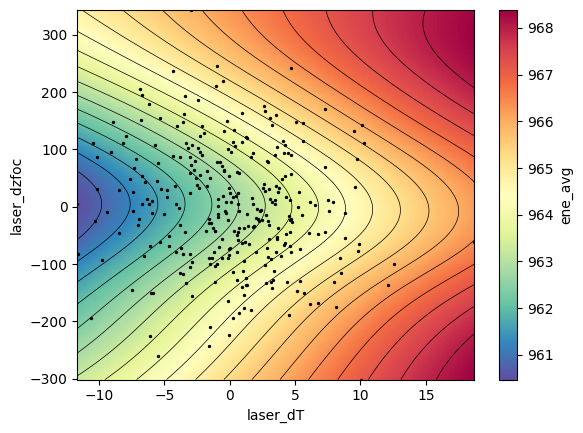

In [3]:
models['ene_avg'].plot_model(xname='laser_dT', yname='laser_dzfoc', cmap='Spectral_r');

#### Sets the corresponding jitter values of the scan
These are the original jitters used in the creation of the data file 

In [4]:
# varying parameters: central values and jitters (rms)
values   = [0.0,   0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
jitters  = [0.5, 100.0, 1.0, 5.0, 5.0, 5.0, 0.5, 0.5]
parvals  = dict(zip(varpars, values))
parjits  = dict(zip(varpars, jitters))

#### Create a random sample according to the given jitters

In [5]:
sample = np.random.normal(size=[10000, len(parvals)]) 
for i, var in enumerate(varpars): 
    sample[:, i] = parvals[var] + parjits[var] * sample[:, i]
sample = pd.DataFrame(sample, columns=varpars) 

#### Evaluate the model for the average energy throughout the sample and compares with the direct result of the scan

average ene_avg = 963.637 +- 0.127%
average ene_avg = 963.682 +- 0.120%


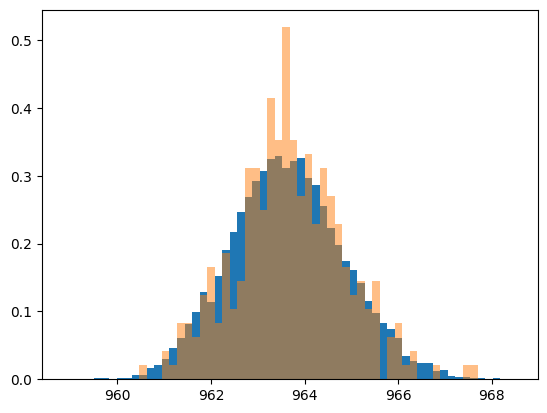

In [6]:
ene, _ = models['ene_avg'].evaluate_model(sample, p0=parvals) 

mean_ene_avg = df['ene_avg'].mean()
plt.hist(ene, bins=60, range=[mean_ene_avg * 0.995, mean_ene_avg * 1.005], density=True);
print('average %s = %.3f +- %.3f%%' % ('ene_avg', np.average(ene), 100 * np.std(ene) / mean_ene_avg))
plt.hist(df['ene_avg'], bins=60, range=[mean_ene_avg * 0.995, mean_ene_avg * 1.005], density=True, alpha=0.5);
print('average %s = %.3f +- %.3f%%' % ('ene_avg', np.average(df['ene_avg']), 100 * np.std(df['ene_avg']) / mean_ene_avg))

#### Varies only one parameter at a time (fixing the rest)
The model allows for independent evaluation of individual jitters

var = laser_dE -> average ene_avg = 9.631e+02 +- 0.022%
var = laser_dzfoc -> average ene_avg = 9.637e+02 +- 0.062%
var = laser_dtau -> average ene_avg = 9.631e+02 +- 0.044%
var = laser_dT -> average ene_avg = 9.631e+02 +- 0.104%
var = laser_dx -> average ene_avg = 9.630e+02 +- 0.014%
var = laser_dy -> average ene_avg = 9.630e+02 +- 0.012%
var = beam_theta_x -> average ene_avg = 9.631e+02 +- 0.005%
var = beam_theta_y -> average ene_avg = 9.631e+02 +- 0.004%


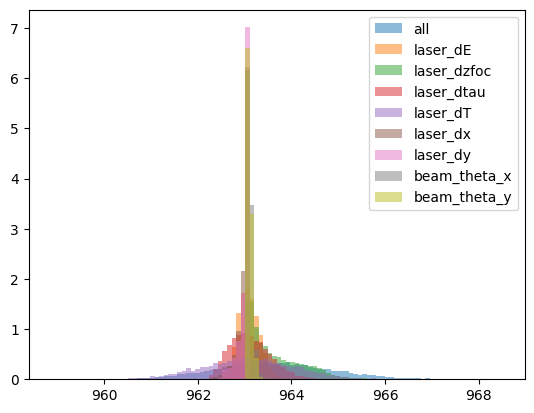

In [7]:
fig = plt.figure(dpi=100)
plt.hist(ene, bins=100, range=[mean_ene_avg * 0.995, mean_ene_avg * 1.005], density=True, alpha=0.5, label='all')
for k in varpars:
    ene, _ = models['ene_avg'].evaluate_model(sample[[k]], p0=parvals) 
    plt.hist(ene, bins=100, range=[mean_ene_avg * 0.995, mean_ene_avg * 1.005], density=True, alpha=0.5, label=k);
    print('var = %s -> average %s = %.3e +- %.3f%%' % (k, 'ene_avg', np.average(ene), 100 * np.std(ene) / mean_ene_avg))
plt.legend(loc='upper right');

The contribution of the timing jitter is the dominant one

#### Now the emittance

average emitt_nx = 5.539e-06 +- 18.550%
average emitt_nx = 5.666e-06 +- 21.082%


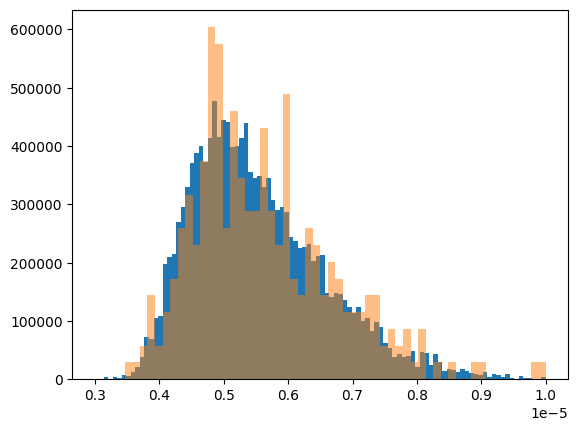

In [8]:
emitt, _ = models['emitt_nx'].evaluate_model(sample, p0=parvals) 

mean_emitt_nx = df['emitt_nx'].mean()
plt.hist(emitt, bins=100, range=[3e-6, 10e-6], density=True);
print('average %s = %.3e +- %.3f%%' % ('emitt_nx', np.average(emitt), 100 * np.std(emitt) / mean_emitt_nx))
plt.hist(df['emitt_nx'], bins=60, range=[3e-6, 10e-6], density=True, alpha=0.5);
print('average %s = %.3e +- %.3f%%' % ('emitt_nx', np.average(df['emitt_nx']), 100 * np.std(df['emitt_nx']) / mean_emitt_nx))

var = laser_dE -> average emitt_nx = 4.544e-06 +- 5.477%
var = laser_dzfoc -> average emitt_nx = 4.819e-06 +- 9.803%
var = laser_dtau -> average emitt_nx = 4.580e-06 +- 7.655%
var = laser_dT -> average emitt_nx = 4.517e-06 +- 0.615%
var = laser_dx -> average emitt_nx = 5.035e-06 +- 11.739%
var = laser_dy -> average emitt_nx = 4.483e-06 +- 0.794%
var = beam_theta_x -> average emitt_nx = 4.762e-06 +- 5.941%
var = beam_theta_y -> average emitt_nx = 4.420e-06 +- 2.123%


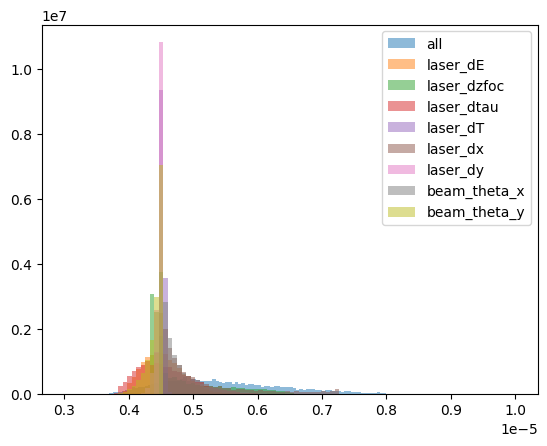

In [9]:
fig = plt.figure(dpi=100)
plt.hist(emitt, bins=100, range=[3e-6, 8e-6], density=True, alpha=0.5, label='all')
for k in varpars:
    emitt, _ = models['emitt_nx'].evaluate_model(sample[[k]], p0=parvals) 
    plt.hist(emitt, bins=100, range=[3e-6, 10e-6], density=True, alpha=0.5, label=k);
    print('var = %s -> average %s = %.3e +- %.3f%%' % (k, 'emitt_nx', np.average(emitt), 100 * np.std(emitt) / mean_emitt_nx))
plt.legend(loc='upper right');

Most significant contribution to the emittance comes from the laser misalignment.
Followed by the laser focal position jitter (??)